# Data Loading

In [29]:
import pandas as pd
#import janitor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer


%matplotlib inline

In [30]:
# -*- coding: utf-8 -*-
'''
a=pd.read_csv('ks-projects-201612.csv',encoding = "ISO-8859-1")
#remove empty columns
a_drop=[i for i in a.columns if 'Unnamed' in i]
a.drop(a_drop,axis=1,inplace=True)
'''
df=pd.read_csv('ks-projects-201801.csv',encoding = "ISO-8859-1")
#b.drop(['usd_pledged_real', 'usd_goal_real'],axis=1,inplace=True)
#%%


In [31]:
print(df.columns)
df.rename(columns={'usd pledged':'usd_pledged'},inplace=True)

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')


### data analysis + cleaning

In [32]:
#look for NaN
df.isna().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd_pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

I suggest dropping the projects that do not have a name tag.

In [33]:
df = df.dropna(subset=['name'])
df.isna().sum()

ID                     0
name                   0
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd_pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

A few strange countrycodes ('N,0"') appears to be in the data - removing these projects.

In [34]:
indexNames = df[df['country'] == 'N,0"'].index
df.drop(indexNames , inplace=True)

As we can't do a document-term matrix of the 'name' attribute of the full dataset (appx. 380000 projects/rows) we reduce the dataset to appx. 1/6 of the total size and only look at success fails. We downscale the amount of success/fails equally, with regards to their total size

In [35]:
def downsize(df, rate_of_removal):

    rate = rate_of_removal  

    df_success = df[df['state'] == 'successful']
    print('shape of successes before removal', df_success.shape)
    df_success = df_success[df_success.index % rate == 0] 
    print('shape of successes after removal', df_success.shape)

    df_fail = df[df['state'] == 'failed']
    print('shape of fails before removal', df_fail.shape)
    df_fail = df_fail[df_fail.index % rate == 0] 
    print('shape of fails after removal', df_fail.shape)

    df_reduced = pd.concat([df_success, df_fail])
    print('new downscaled df has shape', df_reduced.shape)

    try:
        with open('C:/Users/vinde/OneDrive/Dokumenter/DTU/02450/02450Toolbox_Python/Data/stopWords.txt', 'r') as f:
            raw_file = f.read()
        stopwords = raw_file.split('\n')
    
        countvec = CountVectorizer(token_pattern=r'\b[^\d\W]+\b',
                                     stop_words=stopwords)
        countvec.fit_transform(df_reduced.name)
        dtm = pd.DataFrame(countvec.fit_transform(df_reduced.name).toarray(), columns=countvec.get_feature_names())
        return (dtm, rate)
    except:
        new_rate_of_removal = rate+1
        downsize(df, new_rate_of_removal)

(dtm, rate) = downsize(df, 2)
print('removing every n\'th row by', rate)
print('head of dtm is', dtm.head())
        

shape of successes before removal (133851, 15)
shape of successes after removal (67221, 15)
shape of fails before removal (197611, 15)
shape of fails after removal (98537, 15)
new downscaled df has shape (165758, 15)
shape of successes before removal (133851, 15)
shape of successes after removal (44610, 15)
shape of fails before removal (197611, 15)
shape of fails after removal (66067, 15)
new downscaled df has shape (110677, 15)
shape of successes before removal (133851, 15)
shape of successes after removal (33614, 15)
shape of fails before removal (197611, 15)
shape of fails after removal (49216, 15)
new downscaled df has shape (82830, 15)
shape of successes before removal (133851, 15)
shape of successes after removal (26818, 15)
shape of fails before removal (197611, 15)
shape of fails after removal (39424, 15)
new downscaled df has shape (66242, 15)
shape of successes before removal (133851, 15)
shape of successes after removal (22358, 15)
shape of fails before removal (197611, 15)

TypeError: cannot unpack non-iterable NoneType object

In [ ]:
def downsize(df, rate_of_removal):

    rate = rate_of_removal  

    df_success = df[df['state'] == 'successful']
    print('shape of successes before removal', df_success.shape)
    df_success = df_success[df_success.index % rate == 0] 
    print('shape of successes after removal', df_success.shape)

    df_fail = df[df['state'] == 'failed']
    print('shape of fails before removal', df_fail.shape)
    df_fail = df_fail[df_fail.index % rate == 0] 
    print('shape of fails after removal', df_fail.shape)

    df_reduced = pd.concat([df_success, df_fail])
    print('new downscaled df has shape', df_reduced.shape)

    try:
        with open('C:/Users/vinde/OneDrive/Dokumenter/DTU/02450/02450Toolbox_Python/Data/stopWords.txt', 'r') as f:
            raw_file = f.read()
        stopwords = raw_file.split('\n')
        #porter_stemmer = PorterStemmer()
        countvec = CountVectorizer(token_pattern=r'\b[^\d\W]+\b',
                                     stop_words=stopwords)# analyzer = porter_stemmer)
        countvec.fit_transform(df_reduced.name)
        dtm = pd.DataFrame(countvec.fit_transform(df_reduced.name).toarray(), columns=countvec.get_feature_names())
        return (dtm, rate)
    except:
        print('error occured, provide larger rate of removal')

(dtm, rate) = downsize(df, 10)
print('removing every n\'th row by', rate)
print('head of dtm is', dtm.head())

usd_pledged: conversion in US dollars of the pledged column (conversion done by kickstarter).
usd pledge real: conversion in US dollars of the pledged column (conversion from Fixer.io API).
usd goal real: conversion in US dollars of the goal column (conversion from Fixer.io API).

In 3797 cases Kickstarter did not convert the currency successfully to USD (usd_pledged)
Let us further investigate that issue.

In [ ]:
#df where currency is USD, and USD_pledged differs from pledged even though the currency did not change
df[df['currency']=='USD'][['usd_pledged_real','usd_pledged','pledged','currency']][df['usd_pledged']!=df['pledged']].head(10)
#46581 entries seem to have a conversion error from USD to USD 
#so how many others are there? How do other currencies look? Is Fixer.io good?

In [ ]:
#number of unique currencies
print(df.currency.unique())

In [ ]:
#Google 28.02.2020
to_usd={'GBP':1.29, 'USD':1, 'CAD':0.74, 'AUD':0.65, 'NOK':0.11, 'EUR':1.1, 'MXN':0.05, 'SEK':0.10, 'NZD':0.63,
       'CHF':1.04, 'DKK':0.15, 'HKD':0.13, 'SGD':0.72, 'JPY':0.0092}

#function to compare what Kickstarter sais he currency is vs what it should be with current exchange rate within in margin X%
# inf values from deviding by 0 were marked with NaN and then replaced with the mean ignoring the NaNs
def within_Xp(df,X,to_usd=to_usd,col_base='pledged',col_comp='usd_pledged'):
    diff=df[col_base]*[to_usd[i] for i in df['currency']]/df[col_comp]
    diff.replace([np.inf, -np.inf], np.nan,inplace=True)
    diff.replace([np.nan], diff.mean(skipna=True),inplace=True)
    stats=[diff.mean(),diff.std(),len(diff[(diff>(1+X)) | (diff<(1-X))]),len(diff[(diff>(1+X)) | (diff<(1-X))])/len(df)]
    print(col_base,'vs',col_comp,'\nmean,std,,#out of dataset outside','1+-'+str(X),'%out of dataset outside','1+-'+str(X),'\n',stats)
    return diff[(diff>(1+X)) | (diff<(1-X))],stats

In [ ]:
#Kickstarter conversion pledged to USD allowing a possible 30% change in currency since 2014
diff,stats=within_Xp(df,0.3,to_usd=to_usd,col_base='pledged',col_comp='usd_pledged')
diff.hist(bins=[0,1,2,3,4,5,6,7,8,9,10,20,50])

In [ ]:
# the big spike is the inf entries changed to the mean
# 30% of the data is not within boundaries

In [ ]:
#Fixer.io conversion pledged to USD allowing a possible 30% change in currency since 2014
diff,stats=within_Xp(df,0.3,to_usd=to_usd,col_base='pledged',col_comp='usd_pledged_real')
diff.hist(bins=50)

In [ ]:
# at 40% there is no more outliers, so I believe it is best to drop pledged_usd and go with pledged_usd_real

In [ ]:
df.drop(columns='usd_pledged',inplace=True)

In [ ]:
#check for duplicates
df.duplicated().any()

In [ ]:
#set datetime
df['launched']=pd.to_datetime(df['launched'])
df['deadline']=pd.to_datetime(df['deadline'])

## Categorical Features

In [ ]:
#the categorical features and the contribution of the top 15 features to the data
for i in df.columns:
    print('\n',i,df[i].dtype)
    if df[i].dtype=='object' and i!='name':
        #print('# of categories in',i,len(df[i].unique()),'\n',df[i].unique())
        p={e:(df[i]==e).sum()/len(df) for e in df[i].unique()}
        p_sorted={k: v for k, v in sorted(p.items(), key=lambda item: item[1],reverse=True)}
        print({x:p_sorted[x] for c,x in enumerate(p_sorted) if c<15 },'\n')

In [ ]:
state_p={i:(df.state==i).sum()/len(df) for i in df.state.unique()}
state_p_sorted={k: v for k, v in sorted(state_p.items(), key=lambda item: item[1],reverse=True)}

print(state_p_sorted)

https://www.kaggle.com/kemical/kickstarter-projects/discussion/67067
This user hinted that there are successful project without backers
We will remove them

In [ ]:
print('0 backers and succeeded:',((df.backers==0)&(df.state=='successful')).sum())
df[(df.backers==0)&(df.state=='successful')].country.unique()
df=df[~((df.backers==0)&(df.state=='successful'))]

In [ ]:
print('0 backers and money invested:',((df.backers==0)&(df.pledged>0)).sum())
df=df[~((df.backers==0)&(df.pledged>0))]
len(df[~((df.state=='successful')|(df.state=='failed'))])/len(df)

In [36]:
print('failed and goal reached:',((df.state=='failed')&(df.usd_goal_real<df.usd_pledged_real)).sum())
df=df[~((df.state=='failed')&(df.usd_goal_real<df.usd_pledged_real))]

failed and goal reached: 4


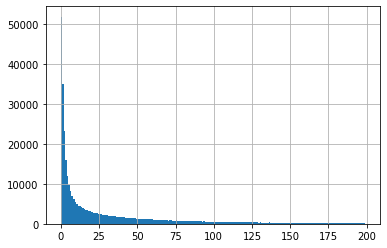

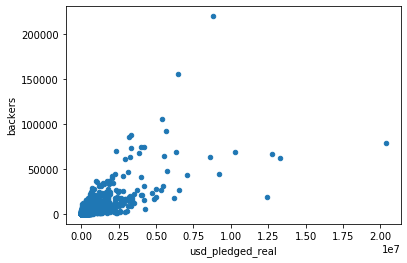

In [37]:
df.backers.hist(bins=range(200))
df[['usd_pledged_real','backers']].plot.scatter(x='usd_pledged_real',y='backers')

Compare success/fail rate for categorical attributes

In [38]:
plot_dict = {}
def cat_plots(attribute, df):
    for cat in df[attribute].unique():    
        success = df[(df[attribute] == cat) & (df['state'] == 'successful')]
        fail = df[(df[attribute] == cat) & (df['state'] == 'failed')]
        plot_dict.update({cat : [len(success.index), len(fail.index)]})
    
    
    labels = list()
    s = list()
    f = list()
    for key in plot_dict:
        labels.append(key)
        s.append(plot_dict[key][0]/(plot_dict[key][0] + plot_dict[key][1])*100)
        f.append(plot_dict[key][1]/(plot_dict[key][0] + plot_dict[key][1])*100)
    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, s, width, label='Success')
    rects2 = ax.bar(x + width/2, f, width, label='Fail')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('%')
    ax.set_title('Success/fail ratio for ' + attribute)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()        


    fig.tight_layout()

    plt.show()

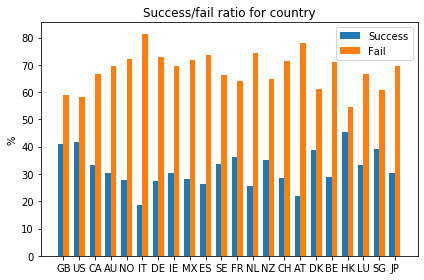

In [39]:
cat_plots('country', df)

As seen below, USD_goal_real doesn't appear to be normal distributed, hence we apply log10 transformation, subtract mean and divide by std.

0.01 166361390.71


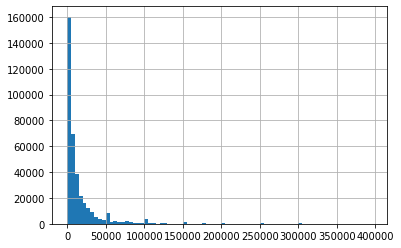

In [40]:
b = df['usd_goal_real']
b.hist(bins = range(0,400000,5000))
print(b.min(), b.max())

c = (b-b.min())/(b.max()-b.min())
#c.hist(bins = 2)

Now the distribution looks suitable for PCA

0     3.186094
1     4.477136
2     4.653222
3     3.699057
4     4.290057
5     4.698979
6     3.000434
7     4.397957
8     5.096913
9     4.812920
10    3.381546
11    4.096945
12    3.699057
13    5.301032
14    3.810953
15    3.398114
16    3.176381
17    3.477266
18    2.399674
19    3.699057
Name: usd_goal_real, dtype: float64
stdev 0.7375083815774056
mean 3.7529639752731545


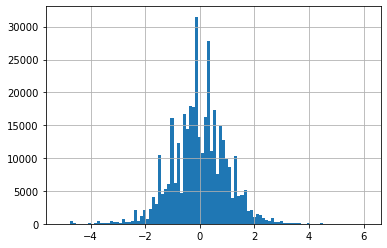

In [41]:
a = df['usd_goal_real']
a = a+1
a = np.log10(a)
print(a.head(20))

stdev = a.std()
print('stdev', stdev)
mean = a.mean()
print('mean', mean)
a = (a-mean)/stdev
a.hist(bins = 100)

# PCA

In [43]:
#translating date 
for i in ['launched','deadline']:
    df[i+'_month']=pd.DatetimeIndex(df.launched).month
    df[i+'_week']=pd.DatetimeIndex(df.launched).week
    df[i+'_day']=pd.DatetimeIndex(df.launched).day
    df[i+'_weekday']=pd.DatetimeIndex(df.launched).weekday
df['timeframe']=(df.deadline-df.launched).astype('timedelta64[h]')/24


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
df_pca=pd.get_dummies(df.drop(columns=['name','ID','deadline','launched','goal','usd_pledged_real','pledged','backers']),columns=['category','launched_month', 'launched_week', 'launched_day',
       'launched_weekday', 'deadline_month', 'deadline_week', 'deadline_day', 'deadline_weekday' ,'main_category', 'currency','country'])
df_pca=df_pca[(df_pca['state']=='failed')|(df_pca['state']=='successful')]

Make document-term matrix for 'name' column.

   aaron  abby  abc  abilities  abraham  absent  absorbing  absurd  abullah  \
0      0     0    0          0        0       0          0       0        0   
1      0     0    0          0        0       0          0       0        0   
2      0     0    0          0        0       0          0       0        0   
3      0     0    0          0        0       0          0       0        0   
4      0     0    0          0        0       0          0       0        0   

   abuse  ...  zombiology  zone  zoo  zoomoos  zozo  zum  zyx  zâ  â  ã  
0      0  ...           0     0    0        0     0    0    0   0  0  0  
1      0  ...           0     0    0        0     0    0    0   0  0  0  
2      0  ...           0     0    0        0     0    0    0   0  0  0  
3      0  ...           0     0    0        0     0    0    0   0  0  0  
4      0  ...           0     0    0        0     0    0    0   0  0  0  

[5 rows x 6373 columns]


In [153]:
#Useful for later classification
mappings={}
from sklearn.preprocessing import LabelEncoder

categorical=['category', 'main_category', 'currency','state','country']

def cat_to_int(df,cats,mappings):
    for i in cats:
        le = LabelEncoder()
        df[i+'_int']=le.fit_transform(df[i])+1
        le.fit(df[i])
        mappings[i] = dict(zip(le.classes_, le.transform(le.classes_)+1))
        df.drop(columns=[i],inplace=True)

    return df , mappings

In [154]:
mappings_pca={}

df_pca,mappings_pca=cat_to_int(df_pca,['state'],mappings_pca)

In [155]:
mappings_pca

{'state': {'failed': 1, 'successful': 2}}

In [156]:
from scipy.linalg import svd
df_pca_s=df_pca[df_pca['state_int']==2]
df_pca_f=df_pca[df_pca['state_int']==1]

attributeNames=list(df_pca.columns)

y=df_pca.state_int


N=len(df_pca)
X=df_pca.drop(columns='state_int').values
#Y = X - np.ones((N,1))*X.mean(axis=0)

from sklearn import preprocessing

x = X #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_pca=pd.DataFrame(x_scaled, columns=df_pca.drop(columns='state_int').columns)

#%%
# PCA by computing SVD of Y
U,S,V = svd(x_scaled,full_matrices=False)
Z = x_scaled @ V


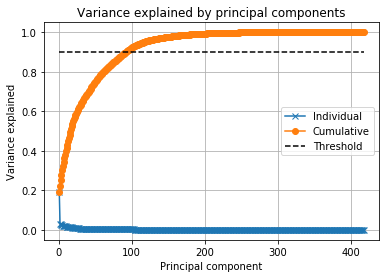

In [157]:
rho = (S*S) / (S*S).sum() 

threshold = 0.9

# Plot variance explained
plt.figure()
plt.plot(range(1,len(rho)+1),rho,'x-')
plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
plt.plot([1,len(rho)],[threshold, threshold],'k--')
plt.title('Variance explained by principal components');
plt.xlabel('Principal component');
plt.ylabel('Variance explained');
plt.legend(['Individual','Cumulative','Threshold'])
plt.grid()
plt.show()

C:\Users\steve\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


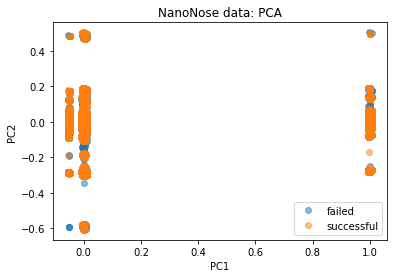

In [35]:
from matplotlib.pyplot import figure, plot, title, xlabel, ylabel, show, legend


i = 0
j = 1
classNames=[i for i in mappings_pca['state']]
C = len(classNames)

# Plot PCA of the data
f = figure()
title('NanoNose data: PCA')
#Z = array(Z)
for c in range(C):
    # select indices belonging to class c:
    class_mask = y==c+1
    plot(Z[class_mask,i], Z[class_mask,j], 'o', alpha=.5)
legend(classNames)
xlabel('PC{0}'.format(i+1))
ylabel('PC{0}'.format(j+1))

# Output result to screen
show()

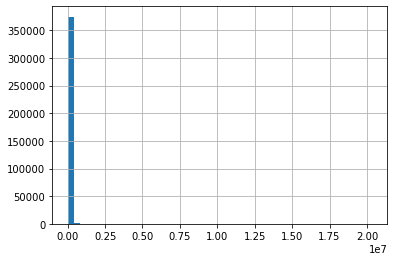

In [36]:
df[df.usd_pledged_real==df.usd_pledged_real.max()]
df.usd_pledged_real.hist(bins=50)

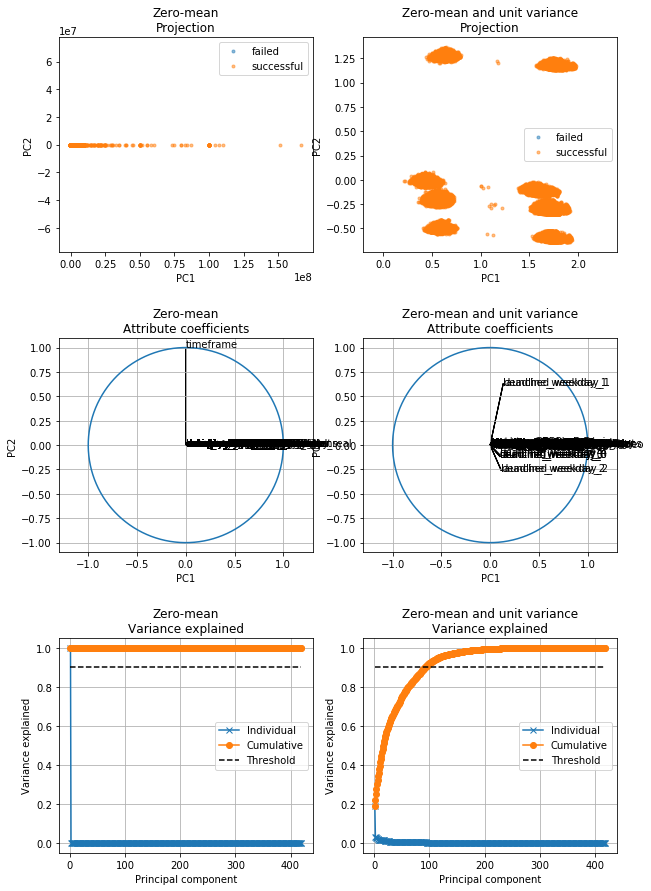

In [37]:

Y1 = X - np.ones((N, 1))*X.mean(0)

# Subtract the mean from the data and divide by the attribute standard
# deviation to obtain a standardized dataset:
Y2 = X - np.ones((N, 1))*X.mean(0)
#Y2 = Y2*(1/np.std(Y2,0))
Y2=x_scaled

Ys = [Y1, Y2]
titles = ['Zero-mean', 'Zero-mean and unit variance']
threshold = 0.9
# Choose two PCs to plot (the projection)
i = 0
j = 1

# Make the plot
plt.figure(figsize=(10,15))
plt.subplots_adjust(hspace=.4)
plt.title('NanoNose: Effect of standardization')
nrows=3
ncols=2


for k in range(2):
    # Obtain the PCA solution by calculate the SVD of either Y1 or Y2
    U,S,Vh = svd(Ys[k],full_matrices=False)
    V=Vh.T # For the direction of V to fit the convention in the course we transpose
    # For visualization purposes, we flip the directionality of the
    # principal directions such that the directions match for Y1 and Y2.
    if k==1: V = -V; U = -U; 
    
    # Compute variance explained
    rho = (S*S) / (S*S).sum() 
    
    # Compute the projection onto the principal components
    Z = U*S;
    
    # Plot projection
    plt.subplot(nrows, ncols, 1+k)
    C = len(classNames)
    for c in range(C):
        plt.plot(Z[y==c,i], Z[y==c,j], '.', alpha=.5)
    plt.xlabel('PC'+str(i+1))
    plt.ylabel('PC'+str(j+1))
    plt.title(titles[k] + '\n' + 'Projection' )
    plt.legend(classNames)
    plt.axis('equal')
    
    # Plot attribute coefficients in principal component space
    plt.subplot(nrows, ncols,  3+k)
    for att in range(V.shape[1]):
        plt.arrow(0,0, V[att,i], V[att,j])
        plt.text(V[att,i], V[att,j], attributeNames[att])
    plt.xlim([-1,1])
    plt.ylim([-1,1])
    plt.xlabel('PC'+str(i+1))
    plt.ylabel('PC'+str(j+1))
    plt.grid()
    # Add a unit circle
    plt.plot(np.cos(np.arange(0, 2*np.pi, 0.01)), 
         np.sin(np.arange(0, 2*np.pi, 0.01)));
    plt.title(titles[k] +'\n'+'Attribute coefficients')
    plt.axis('equal')
            
    # Plot cumulative variance explained
    plt.subplot(nrows, ncols,  5+k);
    plt.plot(range(1,len(rho)+1),rho,'x-')
    plt.plot(range(1,len(rho)+1),np.cumsum(rho),'o-')
    plt.plot([1,len(rho)],[threshold, threshold],'k--')
    plt.title('Variance explained by principal components');
    plt.xlabel('Principal component');
    plt.ylabel('Variance explained');
    plt.legend(['Individual','Cumulative','Threshold'])
    plt.grid()
    plt.title(titles[k]+'\n'+'Variance explained')

plt.show()

In [38]:
rho


array([1.89890353e-01, 3.22885432e-02, 2.84709411e-02, 2.65374204e-02,
       2.58326381e-02, 2.12199876e-02, 1.91611132e-02, 1.79287553e-02,
       1.76708334e-02, 1.73531895e-02, 1.72182788e-02, 1.71071543e-02,
       1.70821394e-02, 1.65551965e-02, 1.62053212e-02, 1.53749344e-02,
       1.49171208e-02, 1.47618332e-02, 1.19639995e-02, 1.15216669e-02,
       1.03631247e-02, 9.77854735e-03, 9.58080045e-03, 8.47135342e-03,
       8.42846147e-03, 8.24273272e-03, 7.99477982e-03, 7.28443708e-03,
       7.17181678e-03, 7.07479333e-03, 6.65506316e-03, 6.46360193e-03,
       6.30475281e-03, 5.81366166e-03, 5.77788581e-03, 5.66966367e-03,
       5.63171481e-03, 5.61974100e-03, 5.56721070e-03, 5.55824032e-03,
       5.50473072e-03, 5.46750492e-03, 5.43972524e-03, 5.43353452e-03,
       5.39954361e-03, 5.39441718e-03, 5.38109212e-03, 5.37517933e-03,
       5.35838283e-03, 5.34404777e-03, 5.21840160e-03, 5.11994274e-03,
       5.04432847e-03, 5.02728517e-03, 4.94800919e-03, 4.92279604e-03,
      

In [40]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2)

model.fit(x_scaled, y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')

In [ ]:
'''from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import matplotlib.pyplot as plt
from skprog.wrappers import TreesProgressor

y=df_pca.state_int
X=df_pca.drop(columns=['state_int','pledged', 'backers', 'usd_pledged_real',])
forest = TreesProgressor(ExtraTreesClassifier(n_estimators=250,
                              random_state=0))


forest.fit(X, y)

importances = forest.clf.feature_importances_
std = np.std([importances for tree in forest.clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]),(X.columns.tolist())[indices[f]])

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()'''